__Research Q:__ <br> Out of all accidents that occur in intersections what is the distribution of accidents by intersection type?

In [46]:
import missingno as msno

import pandas as pd
from pprint import pprint
import matplotlib.pyplot as plt

In [31]:
accidentsdf = pd.read_csv('Multnomah.csv',low_memory=False)

In [32]:
pprint(df.columns)

Index(['Crash ID', 'Record Type', 'Vehicle ID', 'Participant ID',
       'Participant Display Seq#', 'Vehicle Coded Seq#',
       'Participant Vehicle Seq#', 'Serial #', 'Crash Month', 'Crash Day',
       ...
       'Participant Cause 1 Code', 'Participant Cause 2 Code',
       'Participant Cause 3 Code', 'Participant Event 1 Code',
       'Participant Event 2 Code', 'Participant Event 3 Code',
       'BAC Test Results Code', 'Alcohol Use Reported', 'Drug Use Reported',
       'Participant Striker Flag'],
      dtype='object', length=152)


In [33]:
accidentsdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 283832 entries, 0 to 283831
Columns: 152 entries, Crash ID to Participant Striker Flag
dtypes: float64(91), int64(2), object(59)
memory usage: 329.2+ MB


In [40]:
l = df.columns
for m in l:
    print(m, end='|')

Crash ID|Record Type|Vehicle ID|Participant ID|Participant Display Seq#|Vehicle Coded Seq#|Participant Vehicle Seq#|Serial #|Crash Month|Crash Day|Crash Year|Week Day Code|Crash Hour|County Code|City Section ID|Urban Area Code|Functional Class Code|NHS Flag|Highway Number|Highway Suffix|Roadway Number|Highway Component|Mileage Type|Connection Number|Linear Reference System (LRS)|Latitude Degrees|Latitude Minutes|Latitude Seconds|Longitude Degrees|Longitude Minutes|Longitude Seconds|Special Jurisdiction|Jurisdiction Group|Street Number|Nearest Intersecting Street Number|Intersection Sequence Number|Distance from Intersection|Direction From Intersection|Milepoint|Posted Speed Limit|Road Character|Off Roadway Flag|Intersection Type|Intersection Related Flag|Roundabout Flag|Driveway Related Flag|Number of Lanes|Number of Turning Legs|Median Type|Impact Location|Crash Type|Collision Type|Crash Severity|Weather Condition|Road Surface Condition|Light Condition|Traffic Control Device (TCD)|TCD

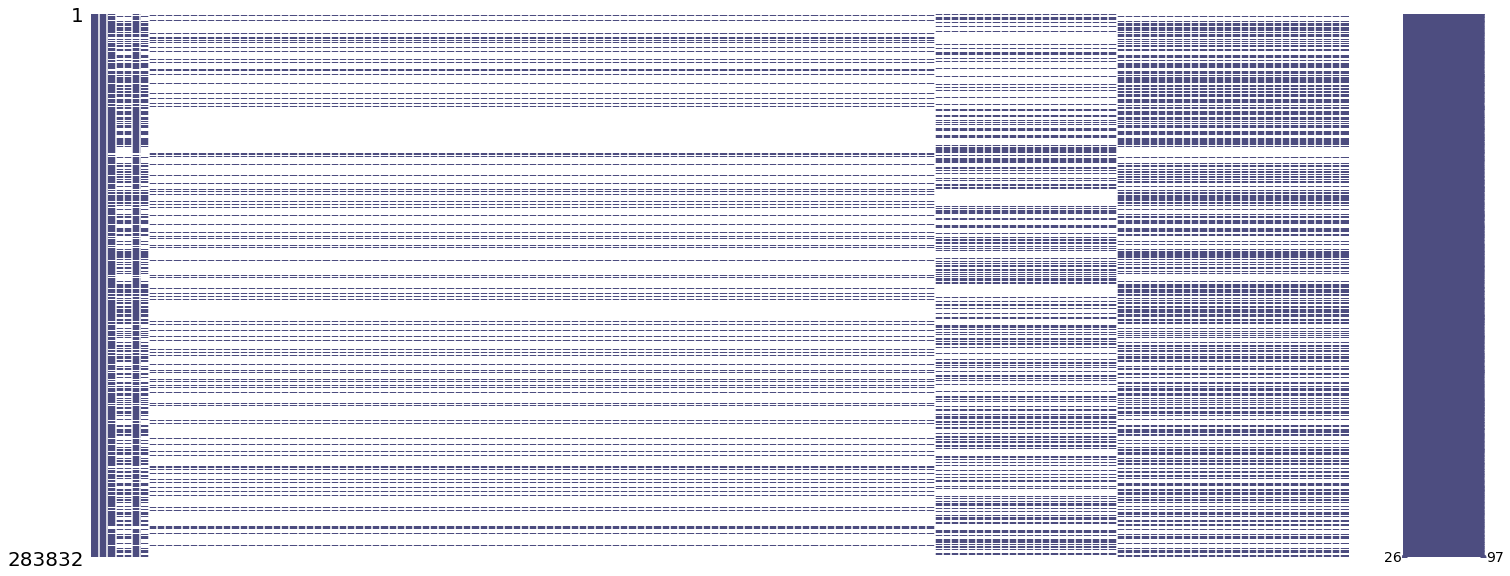

In [34]:
msno.matrix(accidentsdf,color=(.3, .3, .5))

In [35]:
accidentsdf['Intersection Type'].unique()

array([' ', nan, '1', '3', '5', '4', '6', '2', '0'], dtype=object)

In [68]:
usedcol = ['Crash Type','Collision Type','Crash Severity','Intersection Type','Crash ID','Crash Year']
accidentsdf = accidentsdf[usedcol].dropna().reset_index()
accidentsdf.columns = ['Old Index','Crash Type','Collision Type','Crash Severity','Intersection Type','Crash ID','Crash Year']
accidentsdf.to_csv('accidentintersections.csv')

In [69]:
accidentsdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54208 entries, 0 to 54207
Data columns (total 7 columns):
Old Index            54208 non-null int64
Crash Type           54208 non-null object
Collision Type       54208 non-null object
Crash Severity       54208 non-null float64
Intersection Type    54208 non-null object
Crash ID             54208 non-null int64
Crash Year           54208 non-null float64
dtypes: float64(2), int64(2), object(3)
memory usage: 2.9+ MB


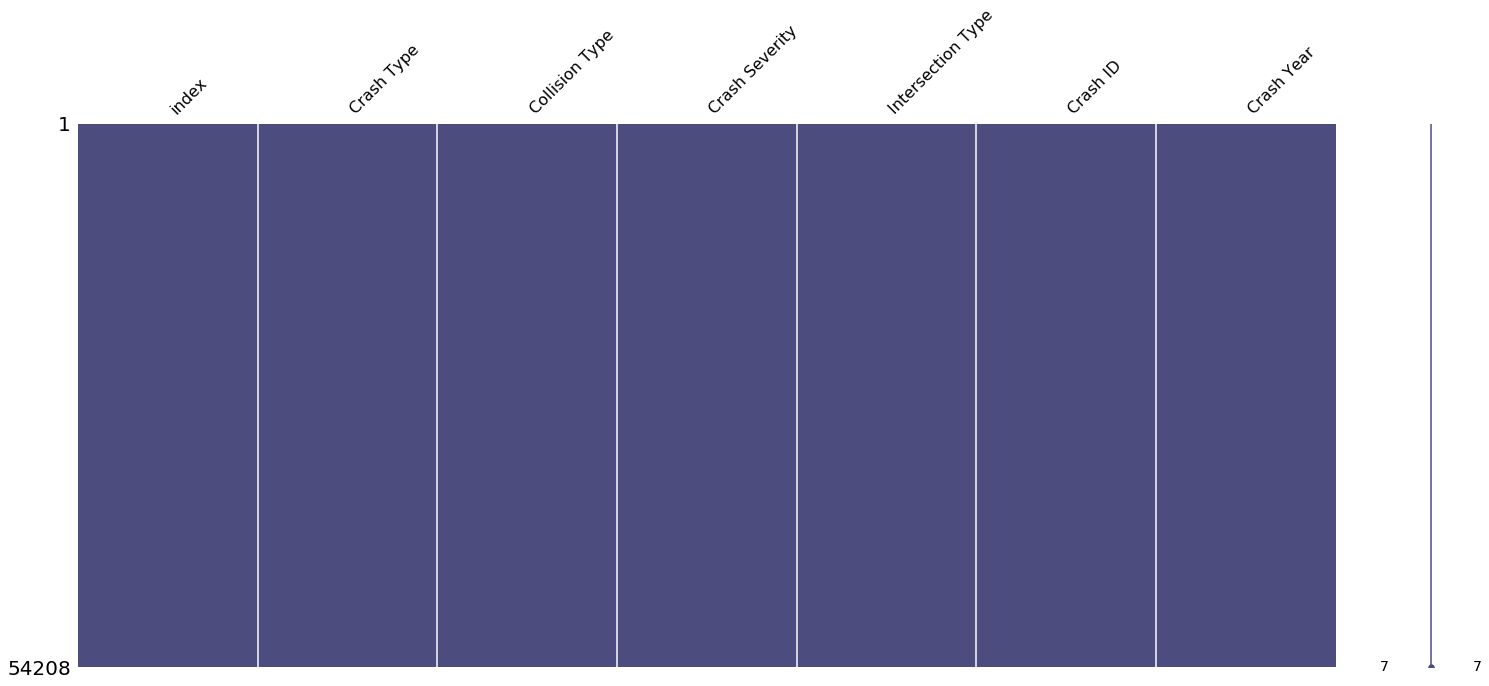

In [64]:
msno.matrix(accidentsdf,color=(.3, .3, .5))
plt.show()

In [65]:
types = dict(accidentsdf['Intersection Type'].value_counts())

In [85]:
list(types.items())

[(' ', 27127),
 ('1', 18011),
 ('3', 7300),
 ('5', 860),
 ('4', 655),
 ('6', 155),
 ('0', 57),
 ('2', 43)]

TypeError: <lambda>() missing 1 required positional argument: 'height'

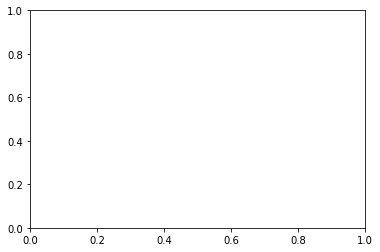

In [86]:
plt.bar(list(types.items()))

In [67]:
accidentsdf.head()

,index,Crash Type,Collision Type,Crash Severity,Intersection Type,Crash ID,Crash Year
0,0,8,9,5.0,,1449628,2012.0
1,5,3,0,4.0,,1449632,2012.0
2,9,2,5,5.0,1,1449640,2012.0
3,14,B,1,4.0,1,1449642,2012.0
4,20,2,5,5.0,,1449649,2012.0
